<html>
<body>
<h1 style="background-color: #022851;"><center>
    <br><font size="+3.5">
    <font color=#FFBF00><b>Python for Data Analytics</b></font>
   </font>
    <br><font size="+1">
    <font color=#FFBF00><b> Diabetes Dataset Analysis  </b></font>
   </font>
    <br><font size="+1">
    <font color=#FFBF00><b>Name:</b> ____Rob Orton / Siva Ramasamy____ </font> <br>
    <font color=#FFBF00><b>Due Date:</b> ___12/17/23____ </font>  
   </font> 
    </center>
</h1>
</body>
</html>


<font color=#022851>
<font size="+2">
    <b>Introduction</b> <br>
</font>
<font size="+.5">
The objective is to explore the diabetes dataset and understand the key factors that cause diabetes. Through data visualization, regression techniques and predictive models, the patients' health history is probed for the probability of diabetes. These models could be useful for diabetes prevention and management. There are many factors like the number of pregnancies, Glucose,	Blood Pressure, Skin Thickness, Insulin, BMI, Diabetes Pedigree Function and 	Age that could impact diabetes. Based on these 8 factors , this dataset predicts if a patient (represented by an Unique ID column) has diabetes or not.
    <br>
       <br>
Dataset Source : https://www.kaggle.com/datasets/nanditapore/healthcare-diabetes
    <br>
    
    
Hypothesis: Patients with diabetes who fall in the top 10% (90th percentile) of both BMI and glucose levels are more likely to exhibit diabetes (Outcome=1)
 </font>
</font>

<html>
<h2 style="background-color: #022851;">
<font size="+2"><br>
    <font color=#FFBF00><b>&nbsp;   &nbsp; Imports Libraries and Dataset</b></font>
    </font>  <br>
</h2>
</html>

In [1]:
#Imports
import pandas as pd
import numpy as py
import plotly.express as px
import matplotlib.pyplot as plt 
import seaborn as sns
from patsy import dmatrices
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
diabetes = pd.read_csv(r'Healthcare-Diabetes.csv')

<html>
<h2 style="background-color: #022851;">
<font size="+2"><br>
    <font color=#FFBF00><b>&nbsp;   &nbsp; Data Cleaning</b></font>
    </font>  <br>
</h2>
</html>

### Checking for Data Completeness

Dataframe attributes like describe(), info (), isnull () etc were used to check if the dataset has missing entries,duplicate entries or null values. This dataset has 2768 rows and 10 columns. All 2768 entries are present across the 10 columns, hence the dataset is complete without missing values ! Upon further inspection, it became clear that many of the columns has 0 for data on many rows.

In [2]:
diabetes

Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0        1            6      148             72             35        0  33.6   
1        2            1       85             66             29        0  26.6   
2        3            8      183             64              0        0  23.3   
3        4            1       89             66             23       94  28.1   
4        5            0      137             40             35      168  43.1   
...    ...          ...      ...            ...            ...      ...   ...   
2763  2764            2       75             64             24       55  29.7   
2764  2765            8      179             72             42      130  32.7   
2765  2766            6       85             78              0        0  31.2   
2766  2767            0      129            110             46      130  67.1   
2767  2768            2       81             72             15       76  30.1   

      DiabetesPedigreeFunction  Age  Outcome  
0                        0.627   50        1  
1                        0.351   31        0  
2                        0.672   32        1  
3                        0.167   21        0  
4                        2.288   33        1  
...                        ...  ...      ...  
2763                     0.370   33        0  
2764                     0.719   36        1  
2765                     0.382   42        0  
2766                     0.319   26        1  
2767                     0.547   25        0  

[2768 rows x 10 columns]

In [3]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


Each row item is an unique patient and the columns contain different patient information as outlined below.

Id: Unique identifier for each data entry.<br>
Pregnancies: Number of times pregnant.<br>
Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test.<br>
BloodPressure: Diastolic blood pressure (mm Hg).<br>
SkinThickness: Triceps skinfold thickness (mm).<br>
Insulin: 2-Hour serum insulin (mu U/ml).<br>
BMI: Body mass index (weight in kg / height in m^2).<br>
DiabetesPedigreeFunction: Diabetes pedigree function, a genetic score of diabetes.<br>
Age: Age in years.<br>
Outcome: Binary classification indicating the presence (1) or absence (0) of diabetes.<br>

In [4]:
diabetes.describe()

Id  Pregnancies      Glucose  BloodPressure  SkinThickness  \
count  2768.000000  2768.000000  2768.000000    2768.000000    2768.000000   
mean   1384.500000     3.742775   121.102601      69.134393      20.824422   
std     799.197097     3.323801    32.036508      19.231438      16.059596   
min       1.000000     0.000000     0.000000       0.000000       0.000000   
25%     692.750000     1.000000    99.000000      62.000000       0.000000   
50%    1384.500000     3.000000   117.000000      72.000000      23.000000   
75%    2076.250000     6.000000   141.000000      80.000000      32.000000   
max    2768.000000    17.000000   199.000000     122.000000     110.000000   

           Insulin          BMI  DiabetesPedigreeFunction          Age  \
count  2768.000000  2768.000000               2768.000000  2768.000000   
mean     80.127890    32.137392                  0.471193    33.132225   
std     112.301933     8.076127                  0.325669    11.777230   
min       0.000000     0.000000                  0.078000    21.000000   
25%       0.000000    27.300000                  0.244000    24.000000   
50%      37.000000    32.200000                  0.375000    29.000000   
75%     130.000000    36.625000                  0.624000    40.000000   
max     846.000000    80.600000                  2.420000    81.000000   

           Outcome  
count  2768.000000  
mean      0.343931  
std       0.475104  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

In [5]:
print('Number of patients:',diabetes['Id'].size)
print('Number of unique patients',diabetes['Id'].nunique())

Number of patients: 2768
Number of unique patients 2768


In [6]:
diabetes.isnull().sum() #check if there are NaN or missing entries.

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

The columns are queried to check if there are any entries with 0's. Columns where 0's are valid data (for ex: Pregnancies & Outcome column) are ignored. There are 4 columns (Glucose, BloodPressure , SkinThickness and Insulin ) with 0's for data.

In [7]:
'''
Routine to calculate the number of "0"s in different columns of the dataset.
'''
count1 = (diabetes['Glucose'] == 0).sum()
print('Count of zeros in Glucose Column : ', count1)
count2 = (diabetes['BloodPressure'] == 0).sum()
print('Count of zeros in BloodPressure Column : ', count2)
count3 = (diabetes['SkinThickness'] == 0).sum()
print('Count of zeros in SkinThickness Column : ', count3)
count4 = (diabetes['Insulin'] == 0).sum()
print('Count of zeros in Insulin Column : ', count4)
count5 = (diabetes['BMI'] == 0).sum()
print('Count of zeros in BMI Column : ', count5)
count6 = (diabetes['DiabetesPedigreeFunction'] == 0).sum()
print('Count of zeros in DiabetesPedigreeFunction Column : ', count6)
count7 = (diabetes['Age'] == 0).sum()
print('Count of zeros in Age Column : ', count7)

Count of zeros in Glucose Column :  18
Count of zeros in BloodPressure Column :  125
Count of zeros in SkinThickness Column :  800
Count of zeros in Insulin Column :  1330
Count of zeros in BMI Column :  39
Count of zeros in DiabetesPedigreeFunction Column :  0
Count of zeros in Age Column :  0


<html>
<h2 style="background-color: #022851;">
<font size="+2"><br>
    <font color=#FFBF00><b>&nbsp;   &nbsp; Data Exploration</b></font>
    </font>  <br>
</h2>
</html>

The function below returns the average of each numerical column based on the diabetes outcome. There is a significant delta in Glucose,Insulin and BMI values between diabetic and non-diabetic patients.

In [8]:
diabetes_columns = [col for col in diabetes.columns]
def find_mean_by_outcome(dataframe, target, numerical_col):
    '''Returns average of each column based on diabetes outcome'''
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n")
print (find_mean_by_outcome.__doc__)
for col in diabetes_columns:
    find_mean_by_outcome(diabetes, "Outcome", col)

Returns average of each column based on diabetes outcome
                  Id
Outcome             
0        1388.143722
1        1377.549370
         Pregnancies
Outcome             
0           3.204295
1           4.769958
            Glucose
Outcome            
0        110.419604
1        141.481092
         BloodPressure
Outcome               
0            68.119493
1            71.070378
         SkinThickness
Outcome               
0            19.945485
1            22.501050
           Insulin
Outcome           
0        70.075991
1        99.302521
               BMI
Outcome           
0        30.494989
1        35.270378
         DiabetesPedigreeFunction
Outcome                          
0                        0.433316
1                        0.543445
               Age
Outcome           
0        31.111233
1        36.987395
         Outcome
Outcome         
0            0.0
1            1.0


__Age Factor in Diabetes :__

Patients in the age range between 20-80 are assessed in this dataset. About 952 people have diabetes while 1816 don't. Many people, though in their prime age between 20-45 are still prone to diabetes.

No. of Patients with Diabetes = 952 (34.39%)
No. of Patients without Diabetes = 1816 (65.61%)


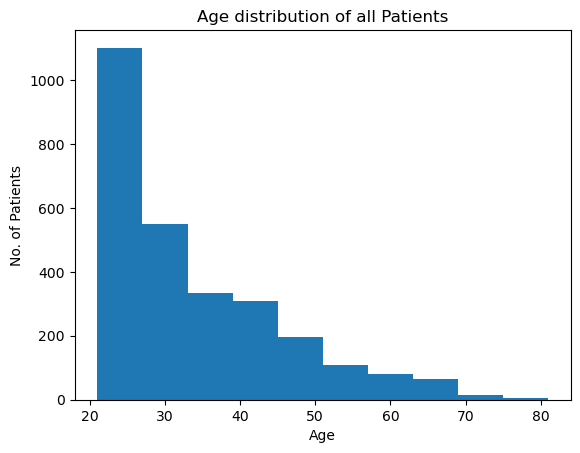

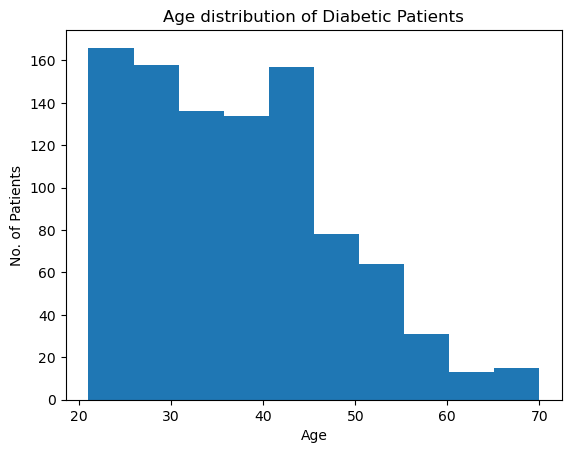

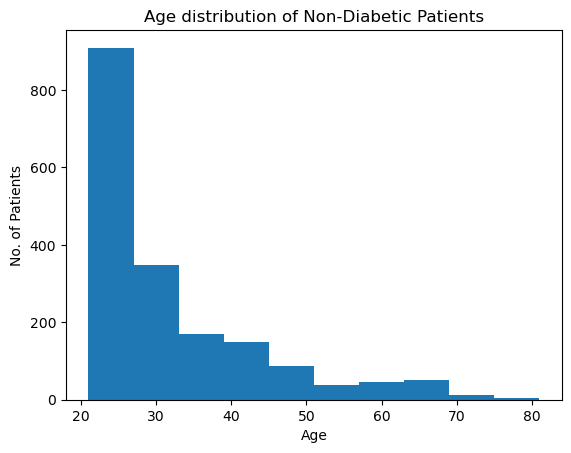

In [9]:
'''
Separate dataframe into people with and without diabetes and find the # of patients for each case. Further,
histogram plots showing age distribution are plotted for different cases.
'''
diabetes_no = diabetes[diabetes['Outcome']==0]
diabetes_yes = diabetes[diabetes['Outcome']==1]
print ("No. of Patients with Diabetes =",len(diabetes_yes), f"({round(len(diabetes_yes)/diabetes['Id'].size*100,2)}%)")
print ("No. of Patients without Diabetes =",len(diabetes_no), f"({round(len(diabetes_no)/diabetes['Id'].size*100,2)}%)")

fig, ax = plt.subplots(1,1)
ax.hist(diabetes['Age'])
plt.title('Age distribution of all Patients')
plt.xlabel('Age')
plt.ylabel('No. of Patients')
plt.show()

fig, ax = plt.subplots(1,1)
ax.hist(diabetes_yes['Age'])
plt.title('Age distribution of Diabetic Patients')
plt.xlabel('Age')
plt.ylabel('No. of Patients')
plt.show()

fig, ax = plt.subplots(1,1)
ax.hist(diabetes_no['Age'])
plt.title('Age distribution of Non-Diabetic Patients')
plt.xlabel('Age')
plt.ylabel('No. of Patients')
plt.show()

__Role of Glucose in Diabetes :__

A person with fasting blood sugar level (glucose) >126mg/dL from 2 separate tests is diabetic (Source:https://www.who.int/data/gho/indicator-metadata-registry/imr-details/2380#:~:text=The%20expected%20values%20for%20normal,and%20monitoring%20glycemia%20are%20recommended.). 1053 Patients have glucose level greater than 126mg/dL of which only 59.4% or 626 patients are diabetic. There are 319 patients with diabetes but their glucose level is still below 126mg/dL. It's not clear if the glucose data in this dataset is the average of 2 tests or just from one test. 

No. of Patients with Diabetes and glucose level above 126mg/dL = 626 (22.62%)
No. of Patients without Diabetes and glucose level above 126mg/dL = 427 (15.43%)
No. of Patients with Diabetes and glucose level below 126mg/dL = 319 (11.52%)


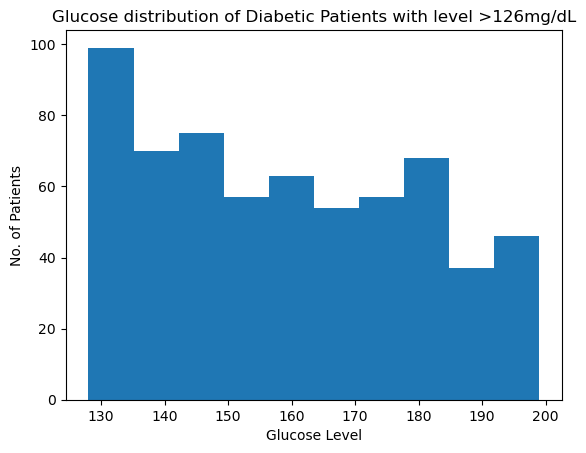

In [10]:
diabetes_yes_glucose_high= diabetes_yes[diabetes_yes['Glucose']>126]
diabetes_no_glucose_high= diabetes_no[diabetes_no['Glucose']>126]
diabetes_yes_glucose_low= diabetes_yes[diabetes_yes['Glucose']<126]

print ("No. of Patients with Diabetes and glucose level above 126mg/dL =",len(diabetes_yes_glucose_high), 
       f"({round(len(diabetes_yes_glucose_high)/diabetes['Id'].size*100,2)}%)")
print ("No. of Patients without Diabetes and glucose level above 126mg/dL =",len(diabetes_no_glucose_high),
       f"({round(len(diabetes_no_glucose_high)/diabetes['Id'].size*100,2)}%)")
print ("No. of Patients with Diabetes and glucose level below 126mg/dL =",len(diabetes_yes_glucose_low),
       f"({round(len(diabetes_yes_glucose_low)/diabetes['Id'].size*100,2)}%)")

fig, ax = plt.subplots(1,1)
ax.hist(diabetes_yes_glucose_high['Glucose'])
plt.title('Glucose distribution of Diabetic Patients with level >126mg/dL')
plt.xlabel('Glucose Level')
plt.ylabel('No. of Patients')
plt.show()

__Number of Pregnancies vs Diabetes :__

The risk of diabetes is higher with more pregnancies. Pregnancies > 7 show higher outcome of diabetes. However, this trend is not clear due to limited data available for pregnancies beyond 9.

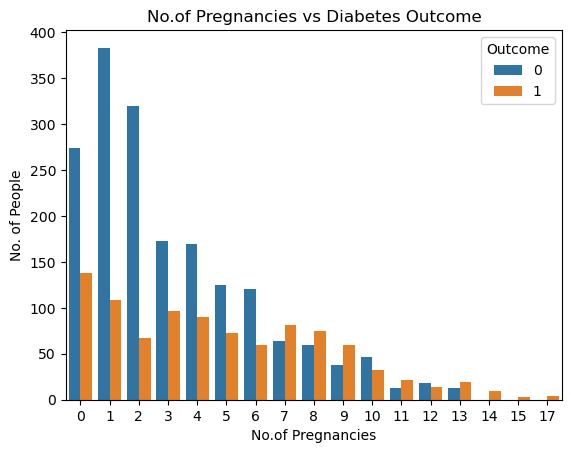

In [11]:
sns.countplot(x='Pregnancies',hue='Outcome',data=diabetes).set(title='No.of Pregnancies vs Diabetes Outcome',
                                                                xlabel='No.of Pregnancies', ylabel='No. of People')
plt.show()

__BMI and Diabetes Pedigree Function vs Diabetes :__

The 'DiabetesPedigreeFunction' is used to find the probability of diabetes based on family history and it has a range between 0.08 to 2.42 (Source : https://dergipark.org.tr/en/download/articlefile/1970853#:~:text=The%20'DiabetesPedigreeFunction'%20is%20a%20function,1%20represents%20those%20with%20diabetes.). It's hard to conclude based on the plots below as both outcomes ( 0 and 1) fall within the same range for 'DiabetesPedigreeFunction' and Body Mass Index (BMI).

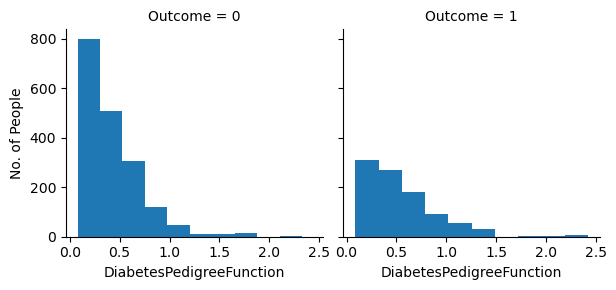

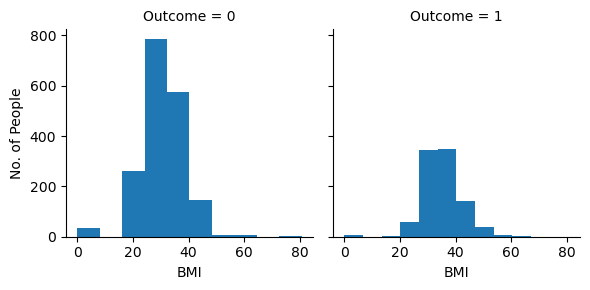

In [12]:
Outcome = sns.FacetGrid(diabetes,col='Outcome')
Outcome.map(plt.hist,'DiabetesPedigreeFunction').set(xlabel='DiabetesPedigreeFunction', ylabel='No. of People')
Outcome = sns.FacetGrid(diabetes,col='Outcome').set(xlabel='BMI', ylabel='No. of People')
Outcome.map(plt.hist,'BMI')
plt.show()

<html>
<h2 style="background-color: #022851;">
<font size="+2"><br>
    <font color=#FFBF00><b>&nbsp;   &nbsp; Data Visualizations</b></font>
    </font>  <br>
</h2>
</html>

__Health Factors (Glucose, Age, Insulin, BMI) vs Diabetes Outcome :__

The correlation scatter plots below show the trend between different health factors and the role they play in diabetes.

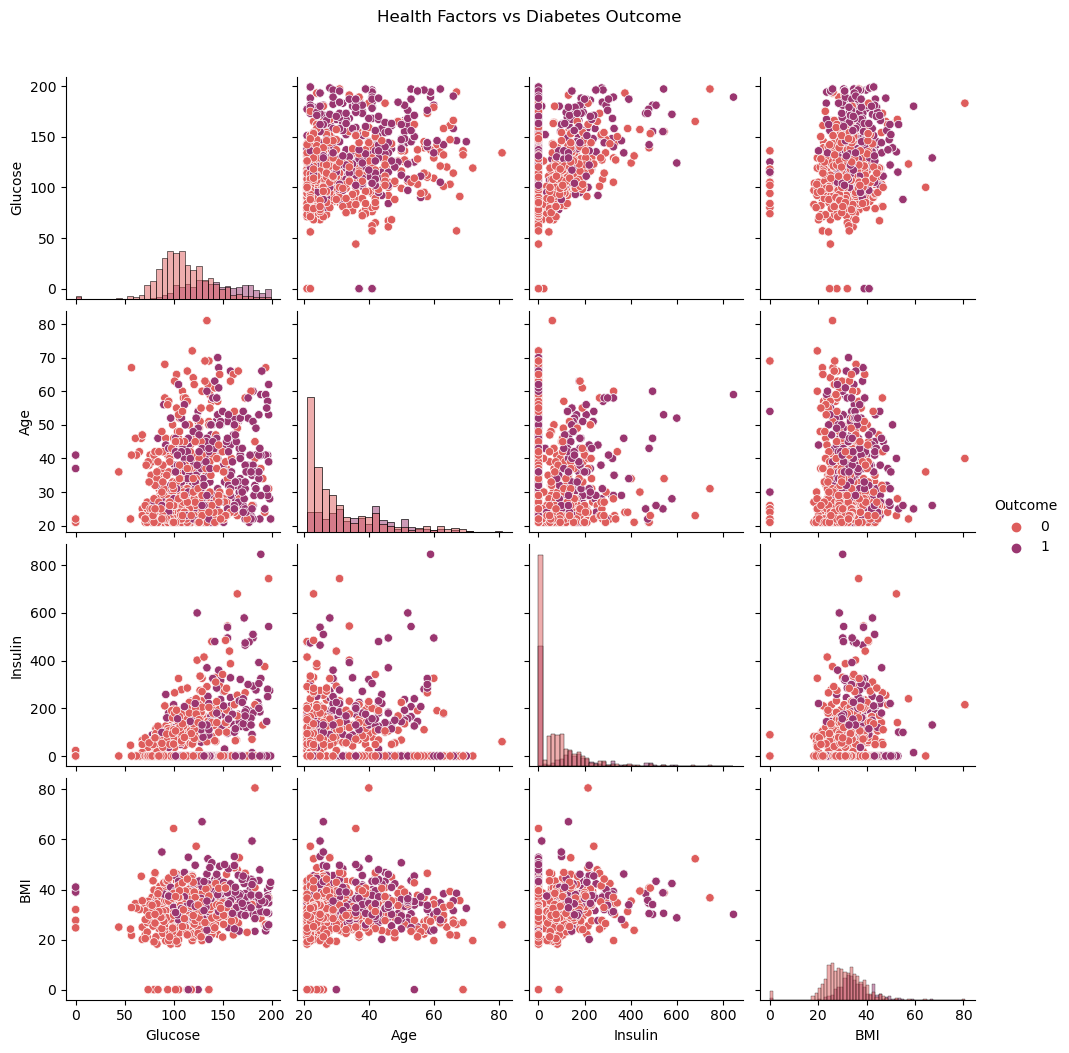

In [13]:
sns.pairplot(diabetes,x_vars=["Glucose","Age","Insulin","BMI"],y_vars=["Glucose", 'Age',"Insulin","BMI"], hue = "Outcome",  
             palette = "flare" , diag_kind = "hist").fig.suptitle("Health Factors vs Diabetes Outcome", y=1.05)   
plt.show()

__Role of Glucose, Insulin, Blood Pressure and Skin Thickness in Diabetes :__

The Role of Glucose, Insulin, Blood Pressure and Skin Thickness in diabetes can be studied from the image below . The hover data is useful to get all the data from one place. It's clear that elevated glucose and insulin levels cause diabetes although there are few outliers.

In [14]:
fig = px.scatter(diabetes , x="Glucose", y="Insulin",
                 size="BloodPressure", color="Outcome",
                 hover_name="SkinThickness", size_max=40)
fig.update_layout(title='<b>Role of Glucose,Insulin,Blood Pressure and Skin Thickness in Diabetes  <b>',title_x=0.5)
fig.update_xaxes(title='<b>Glucose<b>',tickangle=45, tickfont=dict(family='Rockwell', color='crimson', size=14),tickfont_family="Arial Black")
fig.update_yaxes(title='<b>Insulin<b>',tickangle=45, tickfont=dict(family='Rockwell', color='crimson', size=14),tickfont_family="Arial Black")
fig.show()

__Correlation Heat Map of the Variabes in the Diabetes Dataset :__

A heat correlation map of diabetic data, incorporating variables such as "Glucose," 'Age,' "Insulin," and "BMI," visually reveals the interplay between these factors. The map showcases color-coded relationships, with warmer hues indicating stronger correlations. Analyzing this map provides insights into how blood glucose levels align with age, insulin levels, and BMI, offering a comprehensive understanding of the intricate connections within diabetic datasets.

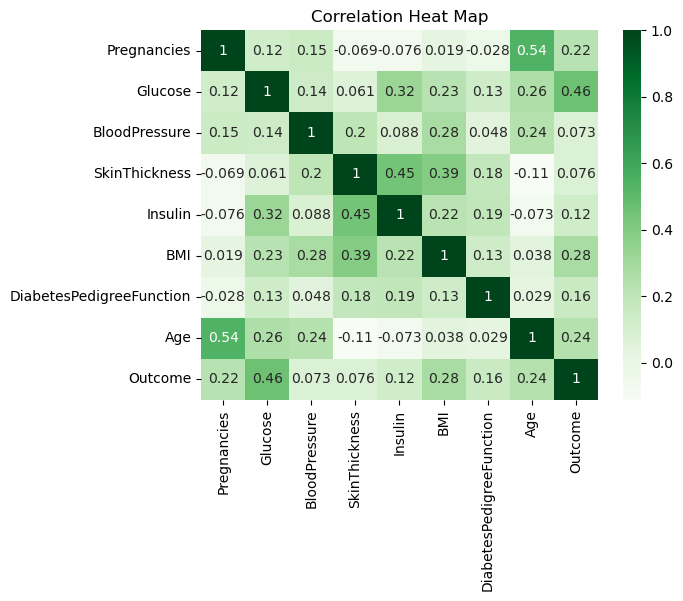

In [15]:
cor = diabetes.drop(["Id"],axis=1).select_dtypes(include='number').copy()
corr_matrix=cor.corr()
sns.heatmap(corr_matrix, annot=True, cmap= 'Greens')
plt.title('Correlation Heat Map')
plt.show()

<html>
<h2 style="background-color: #022851;">
<font size="+2"><br>
    <font color=#FFBF00><b>&nbsp;   &nbsp; Data Analysis</b></font>
    </font>  <br>
</h2>
</html>

__Linear Regression Model__

A linear regression model has been developed for people with diabetes to show the dependence of insulin level on Glucose, BMI and Skin Thickness.

__Insulin = -53.6320 + 0.9541∗(Glucose) - 1.8855∗(BMI) + 3.7531*(SkinThickness)__ 

<br>
<center>Based on the OLS regression, we can say with a significance level of less than .001 <br> that on average, an increase of one unit of glucose level is associated with a 0.95 increase in insulin level, a decrease of one unit of BMI is associated with a 1.88 decrease in insulin level and an increase of one unit of skin thickness is associated with a 3.75 increase in insulin level,all else constant.  </center>

In [16]:
#define predictor and response variables
y = diabetes_yes['Insulin']
x = diabetes_yes[['Glucose','BMI','SkinThickness']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model_insulin = sm.OLS(y, x).fit()

#view model summary
print(model_insulin.summary())

                            OLS Regression Results                            
Dep. Variable:                Insulin   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     126.4
Date:                Sun, 17 Dec 2023   Prob (F-statistic):           6.95e-69
Time:                        14:33:22   Log-Likelihood:                -5846.6
No. Observations:                 952   AIC:                         1.170e+04
Df Residuals:                     948   BIC:                         1.172e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -53.6320     23.998     -2.235

__Logistical Regression Model :__


The following logistic regression model aims to predict the binary outcome variable 'Outcome' (indicating the presence or absence of diabetes) based on three predictor variables: 'Glucose,' 'BMI' (Body Mass Index), and 'Insulin.' The logistic regression model evaluates how 'Glucose,' 'BMI,' and 'Insulin' contribute to the likelihood of an individual having diabetes. The output provides insights into the direction and strength of these associations, aiding in understanding the factors influencing the presence of diabetes in the dataset.

In [17]:
# Defining my X and Y with additional variables 'BMI', 'SkinThickness', and 'Insulin'
X = diabetes[['Glucose', 'BMI', 'Insulin']]
y = diabetes['Outcome']

zipped = list(zip(X['Glucose'], X['BMI'],  X['Insulin'], y))
df = pd.DataFrame(zipped, columns=['Glucose', 'BMI', 'Insulin', 'Outcome'])

y, X = dmatrices('Outcome ~ Glucose + BMI + Insulin',
                 df, return_type="dataframe")

y = py.ravel(y)

model = LogisticRegression(C=100000, fit_intercept=False)
model = model.fit(X, y)
coefficients = pd.DataFrame(py.transpose(model.coef_), index=X.columns, columns=['Coefficient'])
print(coefficients)

           Coefficient
Intercept    -7.440438
Glucose       0.036134
BMI           0.073017
Insulin      -0.001528


<center> With a significance level of 0.000,<br>
    on average, this estimate states that the predicted log odds of having a Outcome=1 <br>
    increase by  0.0361  for each unit of concentration increase in glucose, increases by 0.0730 for each weight in kg / height in m^2 increase in BMI, and decreases by 0.0015 for each mu U/ml increase in Insulin
    <br> holding all else constant.</center>




In [18]:
import statsmodels.formula.api as smf
#fit logistic regression model
model = smf.logit('Outcome ~ Glucose + BMI + Insulin', data=df).fit()

#view model summary
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.503709
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                 2768
Model:                          Logit   Df Residuals:                     2764
Method:                           MLE   Df Model:                            3
Date:                Sun, 17 Dec 2023   Pseudo R-squ.:                  0.2174
Time:                        14:33:22   Log-Likelihood:                -1394.3
converged:                       True   LL-Null:                       -1781.5
Covariance Type:            nonrobust   LLR p-value:                1.481e-167
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.4404      0.320    -23.276      0.000      -8.067      -6.814
Glucose        0.0361      0.

<html>
<h2 style="background-color: #022851;">
<font size="+2"><br>
    <font color=#FFBF00><b>&nbsp;   &nbsp; Training/Testing Data Split using Linear Regression</b></font>
    </font>  <br>
</h2>
</html>

The dataset is split into training and testing sets using train_test_split.
75% of the data is used for training (X_train, y_train), and 25% is used for testing (X_test, y_test).
stratify=y ensures that the class distribution in the training and testing sets is similar.

The accuracy indicates the proportion of correct predictions on the test set.
    An Accuracy of 0.75 means that the model correctly predicted the outcome in approximately 75% of the test samples.
    
The confusion matrix breaks down predictions into true positives, true negatives, false positives, and false negatives which provides a detailed view of the model's performance on different classes.


Summary:
The model has reasonably high precision and recall for class 0 (negative), indicating good performance in correctly identifying instances of class 0.
For class 1 (positive), the model has a lower recall, indicating a lower ability to correctly identify instances of class 1.
The F1-scores provide a balanced measure of precision and recall for both classes.
The macro and weighted averages give an overall summary of model performance considering both classes and their respective support.
The accuracy of 75% represents the overall correctness of predictions on the entire dataset.


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import plotly.graph_objects as go


#diabetes.drop(['Id'],axis=1,inplace=True)
X = diabetes.drop(['Outcome'],axis=1)
y = diabetes['Outcome']

#data=diabetes
# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42,stratify = y)

# Create a logistic regression model
model = LogisticRegression(max_iter=1000)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

features = X_test.columns
importances = model.coef_[0]

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.7543352601156069
Confusion Matrix:
[[401  53]
 [117 121]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.88      0.83       454
           1       0.70      0.51      0.59       238

    accuracy                           0.75       692
   macro avg       0.73      0.70      0.71       692
weighted avg       0.75      0.75      0.74       692



In [20]:
# Create an confusion matrix plot
fig = go.Figure()

fig.add_trace(go.Heatmap(z=conf_matrix,
                         x=['Predicted 0', 'Predicted 1'],
                         y=['Actual 0', 'Actual 1'],
                         colorscale='Viridis', showscale=True))

fig.update_layout(title='Confusion Matrix',
                  xaxis_title='Predicted',
                  yaxis_title='Actual')

# Show the plot
fig.show()

The resulting 'probability_outcome_1' will give you the likelihood of Outcome = 1 for each sample in the new data. The values will be between 0 and 1, where higher values indicate a higher likelihood of Outcome = 1

Patients that fall within the 90th percentile of both 


In [21]:
# Define the condition for filtering new_data
condition1 = (diabetes['BMI'] > diabetes['BMI'].quantile(0.90)) & (diabetes['Glucose'] > diabetes['Glucose'].quantile(0.90))
condition2 = (diabetes['BMI'] > diabetes['BMI'].quantile(0.92)) & (diabetes['Glucose'] > diabetes['Glucose'].quantile(0.92))
condition3 = (diabetes['BMI'] > diabetes['BMI'].quantile(0.94)) & (diabetes['Glucose'] > diabetes['Glucose'].quantile(0.94))
print(type(condition1))

def conit_analyis(condition):
    '''
    Parameters
    ----------
    penguin_df: Series
        set of logical conditions for the prediction model to run on
    
    Returns
    ------
    NoneType
    '''
    # Apply the condition to filter the dataset
    new_data = diabetes[condition].copy()

    # Extract the independent variables for prediction
    X_new_data = new_data.drop(['Outcome'], axis=1)

    # Use the trained model to predict probabilities
    probabilities = model.predict_proba(X_new_data)

    # Extract the probability for Outcome = 1 (positive class)
    probability_outcome_1 = probabilities[:, 1]

    # Add the probabilities to the filtered dataset
    new_data['Probability_Outcome_1'] = probability_outcome_1

    # Count the number of instances where Probability_Outcome_1 is greater than 0.90
    num_high_probabilities = len(new_data[new_data['Probability_Outcome_1'] > 0.90])

    # Count the number of instances where Probability_Outcome_1 is less than 0.90
    num_low_probabilities = len(new_data[new_data['Probability_Outcome_1'] < 0.90])


    # Print or use the new_data with probabilities as needed
    print(new_data[['BMI', 'Glucose', 'Probability_Outcome_1']])
    print('number of prob>90%=', num_high_probabilities, '(', num_high_probabilities/len(probability_outcome_1)*100,'%)')
    print('number of prob<90%=', num_low_probabilities, '(', num_low_probabilities/len(probability_outcome_1)*100,'%)')

print('====================90th Percentile===================')  
conit_analyis(condition1)
print('====================92th Percentile===================')  
conit_analyis(condition2)
print('====================94th Percentile===================')
conit_analyis(condition3)


<class 'pandas.core.series.Series'>
====================90th Percentile===================
       BMI  Glucose  Probability_Outcome_1
43    45.4      171               0.913823
154   47.9      188               0.953001
235   43.6      171               0.841106
237   44.1      179               0.816361
332   43.3      180               0.918761
409   42.4      172               0.730968
445   59.4      180               0.986532
487   46.5      173               0.888084
546   43.6      187               0.948382
661   42.9      199               0.950898
732   44.5      174               0.821771
753   43.3      181               0.671058
761   44.0      170               0.930312
773   46.5      173               0.888207
811   45.4      171               0.914085
922   47.9      188               0.953150
1003  43.6      171               0.841552
1005  44.1      179               0.816861
1100  43.3      180               0.919009
1177  42.4      172               0.731624
1213  

<html>
<h2 style="background-color: #022851;">
<font size="+2"><br>
    <font color=#FFBF00><b>&nbsp;   &nbsp; Conclusion and Recommendations</b></font>
    </font>  <br>
</h2>
</html>

In this analysis of the diabetes dataset, our hypothesis proposing a higher likelihood of diabetes (Outcome = 1) for patients in the top 10% for BMI and glucose levels was partially supported by the logistic regression model. The model achieved an overall accuracy score of 75%, and the predictions for patients in the 90th, 92nd, and 94th percentiles indicated increasing probabilities of having diabetes.

Our model predicted that over 50% of patients in the 90th percentile would have >90% chance of having diabetes. The model also showed the percentage of patients increasing dramatically between the 90th and 95th percentile. For this reason we can say that we failed to reject our hypothesis. However, it's essential to acknowledge that the accuracy of the hypothesis and model depends on factors such as dataset representativeness, feature quality, and model appropriateness. 

In conclusion, while the initial findings suggest a correlation between high BMI and glucose levels with diabetes risk, further analysis and validation are imperative to establish the reliability of the hypothesis and the predictive model. Recommendations for future work include exploring larger and more diverse datasets, improving the choice and combination of variables, and employing additional validation techniques to enhance the accuracy score and robustness of the predictive model for identifying patients at high risk of diabetes based on BMI and glucose levels.